<div dir="rtl">
<font size="6"> Classifying Satellite Images (EuroSAT) Using CNN</font>
</div>
<div dir="rtl">
<font size="4">
In this exercise, you will be faced with an interesting problem in the field of Remote Sensing: building a deep learning model that can recognize land use from <strong>satellite images</strong>. This challenge tests your skills in recognizing complex textures and patterns from a bird's eye view. Unlike the previous exercise, this dataset is <strong>balanced</strong> and your main challenge will be to manually create datasets and design a model to separate closely related visual classes.
<br><br>
<h2><strong>Description of the Dataset (EuroSAT)</strong></h2>
<font size="4">
This dataset contains <strong>27,000</strong> color satellite images taken by the Sentinel-2 satellite. These images are divided into the following <strong>10</strong> land use classes:
<br>
<li><strong>AnnualCrop</strong></li>
<li><strong>Forest</strong></li>
<li><strong>HerbaceousVegetation</strong></li>
<li><strong>Highway</strong></li>
<li><strong>Industrial</strong></li>
<li><strong>Pasture</strong></li>
<li><strong>PermanentCrop</strong></li>
<li><strong>Residential</strong></li>
<li><strong>River</strong></li>
<li><strong>SeaLake</strong></li>
<br>
</font>
</font>
</div>
<br>
<div dir="rtl">
<font size="4">
<br>
<h2><strong>Dataset</strong></h2>
<li>This dataset initially only contains a main folder with subfolders of classes and does not have a train/val/test division.</li>
<li>To access the dataset, you can use the following direct link:
<br>
<a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip" target="_blank">Direct link to download the EuroSAT dataset</a>
</li>
<li>After downloading and unzipping the file, you should be able to find the dataset in a path similar to the following:
<br>
<code>/content/2750/</code>
<br>
This folder contains subfolders such as `Forest`, `River` and...
</li><br>
</font>
</div>

<br>
<div dir="rtl"> <font size="5">Import the required libraries</font> </div>

In [ ]:
# TODO: Required libraries
import os  # For operating system interface and file operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting and visualization

In [ ]:
# Suppress all warnings to keep the output clean and avoid cluttering with warning messages
import warnings
warnings.filterwarnings("ignore")

<br><br>
<div dir="rtl"> <font size="5">Download Dataset</font> </div>
<br>
<div dir="rtl">
<font size=4>Guide to Automatic Dataset Download:</font><br>
<font size="4">
Instead of using system commands and manually downloading datasets, the Keras library has a very useful helper function to automatically download and extract files from the Internet.
Your task is to find and use this function.
</font>
</div>

In [ ]:
# Download dataset if needed, note that paths may vary based on folder structure
DATASET_URL = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"

# Custom path for saving the ZIP file
base_dir="../"
zip_path = os.path.join(base_dir, "EuroSAT.zip")

# Download and extract the dataset using Keras utility
path_to_zip = tf.keras.utils.get_file(
    fname="EuroSAT.zip",                  # Only the filename
    origin=DATASET_URL,
    extract=True,
    cache_dir=base_dir                    # Custom path for storage
)

print("Downloaded at:", path_to_zip)

94280567/94280567 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
دانلود شد در: ./datasets/EuroSAT_extracted


In [ ]:
# Remove the downloaded ZIP file to save storage space after extraction
os.remove("../datasets/EuroSAT.zip")

In [ ]:
# Define the path to the extracted dataset directory containing 2750 subdirectories
dataset_path="../datasets/EuroSAT_extracted/2750"

<br>
<div dir="rtl"> <font size="5">Dataset Review and Analysis</font> </div>
<br>
<div dir="rtl">
<font size="4">1. Data Distribution Analysis<font size="4">
<font size="4"><br>
Write a function that counts the number of images in each class to ensure that the dataset is balanced.
<br><br>
<strong>Implementation Steps:</strong>
<br>
<li>Define a function that takes an input path.</li>
<li>Loop through the folders in that path and count the number of files in each folder with `len(os.listdir(...))`.</li>
<li>Store the results (class name and count) in a dictionary.</li>
<li>Finally, convert the dictionary to a Pandas DataFrame and return it.</li>
</fornt>
</div>

In [ ]:
def count_class_distribution(dataset_dir, valid_exts={'.jpg', '.jpeg', '.png', '.tif'}) ->pd.DataFrame:
    """
    Count the number of images in each class folder.

    This function is only responsible for file system interaction and collecting file counts
    in class folders.

    Inputs:
        data_path (str): Path to the dataset directory containing class folders.

    Output:
        pd.DataFrame: A pandas DataFrame with class names as index
        and image counts as values for each row.
    """
    # Dictionary to store class names and their corresponding image counts
    class_counts = {}

    # Iterate through all items in the dataset directory
    for class_name in os.listdir(dataset_dir):
        # Create full path to the class directory
        class_path = os.path.join(dataset_dir, class_name)
        # Check if the item is a directory (representing a class)
        if os.path.isdir(class_path):
            # List all valid image files in the class directory
            image_files = [
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f)) and os.path.splitext(f)[1].lower() in valid_exts
            ]
            # Store the count of images for this class
            class_counts[class_name] = len(image_files)

    # Create DataFrame from the collected counts
    df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
    return df

In [ ]:
# Call the function to count class distribution and store result in DataFrame
df = count_class_distribution(dataset_path)

# Print the DataFrame showing class names and their corresponding image counts
print(df)

                  Class  Image Count
0            AnnualCrop         3000
1                Forest         3000
2  HerbaceousVegetation         3000
3               Highway         2500
4            Industrial         2500
5               Pasture         2000
6         PermanentCrop         2500
7           Residential         3000
8                 River         2500
9               SeaLake         3000


<br>
<div dir="rtl">
<font size="4">2. Visualize and analyze data distribution<font size="4"><br>
<font size="4">
Write a function that uses a counted DataFrame to visualize and analyze data balance.
<br><br>
<strong>Implementation steps:</strong>
<br>
<li>Define a function that takes a DataFrame as input.</li>
<li>Plot a bar graph of the class distribution using `seaborn.barplot`.</li>
<li>Write a condition to check the balance of the dataset.</li>
<br>
- Hint: If the number of unique values ​​in the count column is 1, the dataset is balanced.
<br>
<li>Print an appropriate message indicating whether the dataset is balanced or unbalanced.</li>
<li>Finally, return a Boolean value (True/False).</li>
</fornt>
</div>

In [ ]:
def plot_and_analyze_distribution(df_counts: pd.DataFrame) -> bool:
    """
    Plot class distribution from DataFrame and analyze their balance level.

    Inputs:
        df_counts (pd.DataFrame): A DataFrame containing 'Class' and 'Image Count' columns

    Outputs:
        bool: True if dataset is balanced, False otherwise
    """

    # Plot bar chart of class distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Image Count', data=df_counts, palette='mako')
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of pictures in each class')
    plt.tight_layout()
    plt.show()

    # Check dataset balance
    unique_counts = df_counts['Image Count'].nunique()
    is_balanced = unique_counts == 1

    # Print appropriate message
    if is_balanced:
        print("The dataset is balanced: the number of images in all classes is equal.")
    else:
        print("The dataset is unbalanced: the number of images in the classes is different.")

    return is_balanced

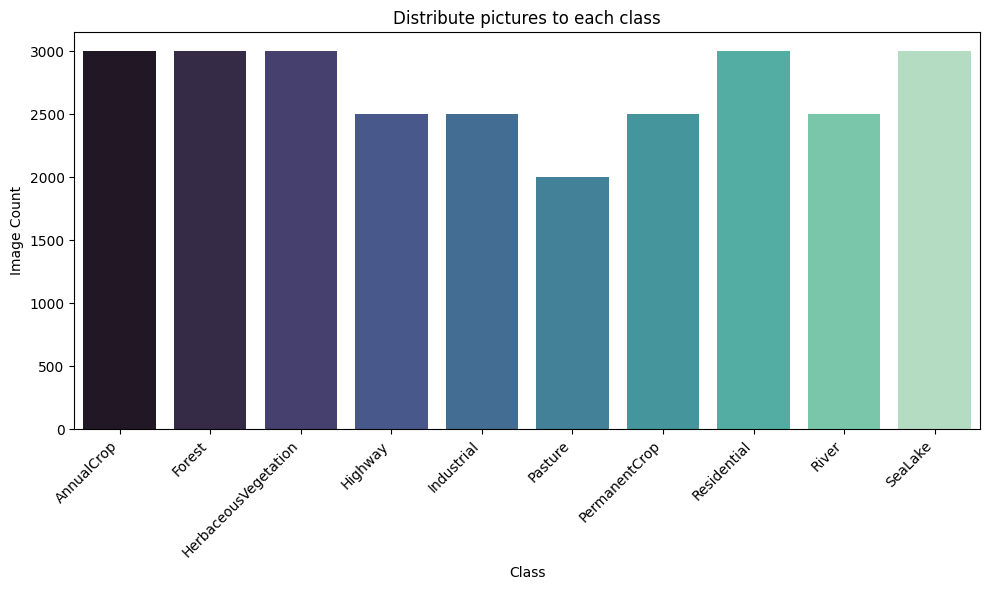

The dataset is unbalanced: the number of images in the classes is different.


False

In [ ]:
# Call the function to plot class distribution and analyze balance
plot_and_analyze_distribution(df)

<br>
<div dir="rtl">
<font size="5">Automatically load and split the dataset<font size="5">
</div>
<div dir="rtl">
<font size="4">Setting key model parameters<font size="4"><br>
<font size="4">
In this cell, we define the main parameters that affect the training process and model architecture.
<br>
<li>IMG_SIZE: The target dimensions to which all input images are resized. This is necessary to have uniform input for the model.</li>
<li>BATCH_SIZE: The number of images that the model processes simultaneously at each stage of training. This parameter affects the speed and memory consumption.</li>
</font>
</div>

In [21]:
# TODO: Choose appropriate values for the variables below.
IMG_SIZE =  (64,64)        # Image size for resizing
BATCH_SIZE = 32       # Batch size for training

<br>
<div dir="rtl">
<font size="4">
In this step, we load the dataset from the main directory and automatically split it into two training and validation sets.
<br>
<li>Use the <code>tf.keras.utils.image_dataset_from_directory</code> function twice; once for the training set and once for the validation set.</li>
<li>In both calls, use the <code>validation_split=0.2</code> argument to split the data.
</fornt>
</div>

In [23]:
# Define the main dataset path
dataset_path = '../datasets/EuroSAT_extracted/2750'  # Main dataset path

# Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Use 20% of data for validation
    subset="training",      # Select training subset
    seed=42,               # For reproducibility
    image_size=IMG_SIZE,   # Resize images to specified size
    batch_size=BATCH_SIZE  # Set batch size
)

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # Use 20% of data for validation
    subset="validation",   # Select validation subset
    seed=42,               # For reproducibility (same seed as training)
    image_size=IMG_SIZE,   # Resize images to specified size
    batch_size=BATCH_SIZE  # Set batch size
)

Found 27000 files belonging to 10 classes.
Using 21600 files for training.
Found 27000 files belonging to 10 classes.
Using 5400 files for validation.


In [ ]:
# Iterate through the first 3 batches of the training dataset
for images, labels in train_ds.take(3):
    print(" Image format:", images.shape)  # Print the shape/dimensions of the image batch
    print(" Labels:", labels.numpy())      # Print the corresponding labels as numpy array
    print("-" * 90)                        # Print separator line

 Image format: (32, 64, 64, 3)
 Labels: [3 3 2 4 4 9 2 9 8 2 8 4 6 7 8 1 2 6 9 3 9 1 3 6 1 5 7 2 5 9 2 9]
------------------------------------------------------------------------------------------
 Image format: (32, 64, 64, 3)
 Labels: [8 7 4 1 8 6 3 6 6 3 4 3 8 6 4 6 0 8 2 9 1 7 5 7 3 9 9 0 9 0 7 4]
------------------------------------------------------------------------------------------
 Image format: (32, 64, 64, 3)
 Labels: [2 9 4 9 8 2 9 9 5 5 3 5 7 1 4 3 2 0 4 4 4 9 3 1 5 5 9 1 1 4 1 1]
------------------------------------------------------------------------------------------


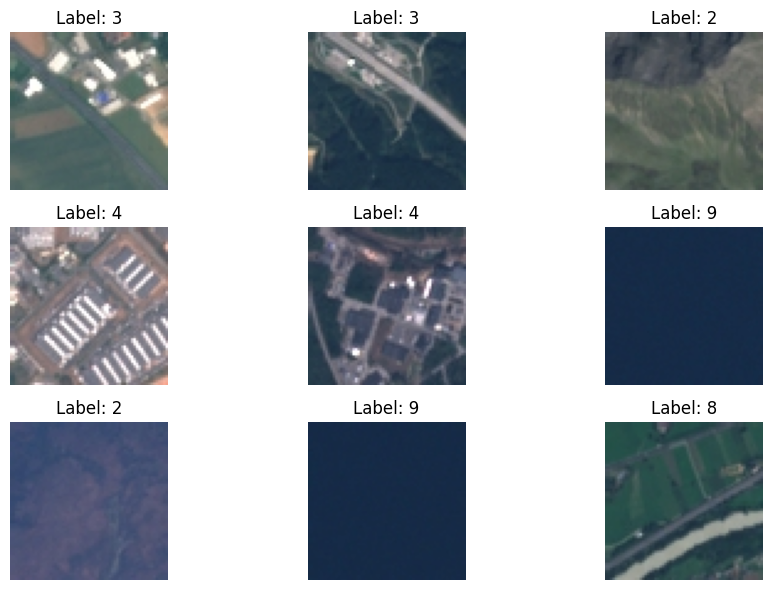

In [ ]:
# Take one batch from the training dataset
for images, labels in train_ds.take(1):
    # Create a figure for displaying images
    plt.figure(figsize=(10, 6))
    # Display 9 images in a 3x3 grid
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Display image (convert to uint8 for proper visualization)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Set title with corresponding label
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")  # Hide axes
    plt.tight_layout()   # Adjust spacing between subplots
    plt.show()           # Display the plot

<br>
<div dir="rtl">
<font size="4">Get Class Names</font><br>
<font size="4">
In this section, extract the class names from the loaded dataset.
</font>
</div>

In [ ]:
# TODO: Extract class names from the loaded dataset

class_names = train_ds.class_names  # Get class names from the training dataset
print(class_names)  # Print the list of class names
print(len(class_names))  # Print the number of classes

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
10


<br>
<div dir="rtl">
<font size=5>Data Augmentation and Pipeline Optimization</font>
</div>
<br>
<div dir="rtl">
<font size=4>
1. Data Augmentation Definition:
<br>
Build a pipeline with Keras layers that randomly applies transformations such as rotation, flipping, and scaling to training images.
<br>
</font>
</div>

In [ ]:
# TODO: Implement Data Augmentation layers
# Create data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Horizontal and vertical flipping
    tf.keras.layers.RandomRotation(0.25),                   # Rotation up to 90 degrees (0.25 * 360)
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Translation in both axes
    tf.keras.layers.RandomZoom(0.2)                         # Zoom up to 40%

], name="data_augmentation")

<br>
<div dir="rtl">
<font size=4>
2. Dataset Optimization:
<br>
We prepare the datasets for maximum speed during training using the following methods:
<br>
<li>.cache(): Caches data in RAM so that reading from disk is not repeated for each training round.</li>
<li>.shuffle(): Shuffles the order of the training data.</li>
<li>.prefetch(): Preps the next batch of data in the background so that the GPU never has to wait for data.</li>
These optimizations are essential for a fast and efficient training process.
<br>
Further reading:
</font>
</div>

[Tensorflow | tf.data API](https://www.tensorflow.org/guide/data_performance)
<br>

In [ ]:
# For further study, check the following resources:
# https://www.tensorflow.org/guide/data_performance

# TODO: Cache data in memory for faster training (only if sufficient RAM is available)

AUTOTUNE = tf.data.AUTOTUNE  # Let TensorFlow automatically tune the prefetch buffer size

# Optimize training dataset pipeline
train_ds = train_ds.cache()  # Cache dataset in memory after first epoch
train_ds = train_ds.shuffle(buffer_size=2185)  # Shuffle data with buffer size
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch batches for better GPU utilization

# Optimize validation dataset pipeline
# Note: Validation dataset doesn't need shuffling
val_ds = val_ds.cache()  # Cache validation data
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch validation batches

In [ ]:
# Define normalization function
def normalize_img(image, label):
    """Normalize pixel values to the range [0, 1]"""
    image = tf.cast(image, tf.float32)  # Convert to float32
    image = image / 255.0  # Divide by 255 for normalization
    return image, label

# Apply normalization function to training and validation data
train_ds = train_ds.map(normalize_img, num_parallel_calls=AUTOTUNE)  # Parallel processing for training data
val_ds = val_ds.map(normalize_img, num_parallel_calls=AUTOTUNE)  # Parallel processing for validation data

<br>
<div dir="rtl">
<font size=5>Building the CNN Model Architecture</font>
<br>
<font size="4">
In this cell, we have defined a function to build and fully compile our CNN model. Complete the code.
</font>
</div>

In [ ]:
# Import necessary Keras modules and layers for building neural network models
from tensorflow.keras.models import Sequential, load_model  # For creating sequential models and loading saved models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D  # Various layer types for CNN architecture

In [ ]:
# TODO: Complete the method below.
def build_model(input_shape, augmentation_layer ,num_classes):
    """
    Builds an optimized CNN architecture for image classification.

    This model uses deep convolutional blocks with BatchNormalization for stable
    and fast training. To prevent overfitting, it utilizes GlobalAveragePooling2D and Dropout.

    Args:
        input_shape (tuple): Input image dimensions (e.g., `(64, 64, 3)`).
        num_classes (int): Number of output classes.
        augmentation_layer (tf.keras.layers.Layer): Data augmentation layer.

    Returns:
        tf.keras.Model: A compiled Keras model ready for training.
    """
    model = Sequential([

        # Input layer defining the input shape
        tf.keras.layers.InputLayer(input_shape=input_shape),
        # Data augmentation layer
        augmentation_layer,

        # First convolutional block
        Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same' ),
        BatchNormalization(),  # Normalize activations for stable training

        # Second convolutional block
        Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu',  padding='same' ),
        BatchNormalization(),

        # First max pooling for downsampling
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # Third convolutional block with more filters
        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Second downsampling

        # Fourth convolutional block
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),

        # Fifth convolutional block
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),

        # Sixth convolutional block
        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Third downsampling

        # Global average pooling to reduce parameters before dense layers
        GlobalAveragePooling2D(),

        # First fully connected layer with dropout
        Dense(256, activation='relu'),
        Dropout(0.2),  # Regularization to prevent overfitting

        # Second fully connected layer with dropout
        Dense(256, activation='relu'),
        Dropout(0.2),  # Regularization to prevent overfitting

        # Output layer with softmax activation for multi-class classification
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# TODO: Create a model using the method
input_shape=(64, 64,3)  # Define input shape: 64x64 pixels with 3 color channels (RGB)

# Build the model with specified input shape, data augmentation, and 10 output classes
model = build_model(input_shape=input_shape,augmentation_layer=data_augmentation,num_classes=10)

In [ ]:
# TODO: Check the Summary
model.summary()  # Display the model architecture with layer details and parameter counts

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,423,818 (13.06 MB)

 Trainable params: 3,421,002 (13.05 MB)

 Non-trainable params: 2,816 (11.00 KB)

<br>
<div dir="rtl">
<font size=4>Control the training process with Callbacks:</font><br>
<font size="4">
Implement the following callbacks.
<strong>We use three key callbacks:</strong>
<br><br>
<li>ModelCheckpoint
<br>
<li>EarlyStopping
<br>
<li>ReduceLROnPlateau
<br><br>
These three tools are placed in a list so that we can use them in the next step, when training the model.
</font>
</div>

In [ ]:
# TODO: Compile the model
model.compile(optimizer='adam',  # Adam optimizer for adaptive learning rate
              loss='sparse_categorical_crossentropy',  # Loss function for integer labels
              metrics=['accuracy'])  # Track accuracy during training

In [ ]:
# Import training callbacks for model training optimization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau  # Import training callbacks

In [ ]:
# TODO: Implement ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="./best_model_epoch.keras",     # Path to save the best model
                            monitor="val_accuracy",                   # Monitor validation accuracy
                            save_best_only=True,                      # Only save the best model
                            mode="max",                              # Maximize the monitored metric
                            verbose=1)                               # Print saving messages

# TODO: Implement ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',               # Monitor validation accuracy
                              factor=0.5,                           # Reduce learning rate by half
                              patience=3,                           # Wait for 3 epochs without improvement
                              min_lr=1e-6,                          # Minimum learning rate
                              verbose=1)                            # Print reduction messages

# TODO: Implement EarlyStopping
early_stopping = EarlyStopping(monitor="val_accuracy",              # Monitor validation accuracy
                               patience=5,                          # Wait for 5 epochs without improvement
                               restore_best_weights=True,           # Restore weights from best epoch
                               verbose=1)                           # Print stopping messages

# Define a list of Callbacks
callbacks_list = [checkpoint, early_stopping, reduce_lr]            # Combine all callbacks

<br>
<div dir="rtl">
<font size=5>Train the CNN Model</font>
<br>
<font size="4">
Train the model.
</font>
</div>

In [ ]:
# TODO: Train the model
history = model.fit(train_ds, epochs=40,  # Train for maximum 40 epochs
                    validation_data=val_ds,  # Use validation data for evaluation
                    callbacks=callbacks_list)  # Apply all callbacks during training

Epoch 1/40
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5294 - loss: 1.3364
Epoch 1: val_accuracy improved from -inf to 0.40741, saving model to ./best_model_epoch.keras
675/675 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.5295 - loss: 1.3361 - val_accuracy: 0.4074 - val_loss: 2.2798 - learning_rate: 0.0010
Epoch 2/40
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6870 - loss: 0.8869
Epoch 2: val_accuracy improved from 0.40741 to 0.69352, saving model to ./best_model_epoch.keras
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.6870 - loss: 0.8869 - val_accuracy: 0.6935 - val_loss: 0.9947 - learning_rate: 0.0010
Epoch 3/40
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7513 - loss: 0.7133
Epoch 3: val_accuracy did not improve from 0.69352
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.7513 - loss: 0.7133 - val_accuracy: 0.6770 - val_loss: 1.0476 - learning_rate: 0.0010
Epoch 4/40
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7

<br>
<div dir="rtl">
<font size=5>Accuracy and Loss Graph for CNN Model</font>
<br>
<font size="4">
Draw the Loss and Accuracy Graph.
</font>
</div>

In [ ]:
# TODO: Plot Loss and Accuracy charts
def plot_training_history(history):
    """
    Plot accuracy and loss graphs for training and validation data.

    This function creates two plots:
    1. Accuracy plot showing model accuracy during training and validation.
    2. Loss plot showing model loss during training and validation.

    Parameters:
    - history: Object containing model training history information. This object is typically returned from the `fit()` method of Keras model and contains accuracy and loss values for training and validation for each epoch.

    The generated plots will be as follows:
    - First plot displays training and validation accuracy.
    - Second plot displays training and validation loss.

    Output:
    - Displays accuracy and loss plots.
    """

    # Extract accuracy and loss values from history
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')

    # Create epochs range
    epochs = range(1, len(acc) + 1)

    # Create figure with two subplots
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

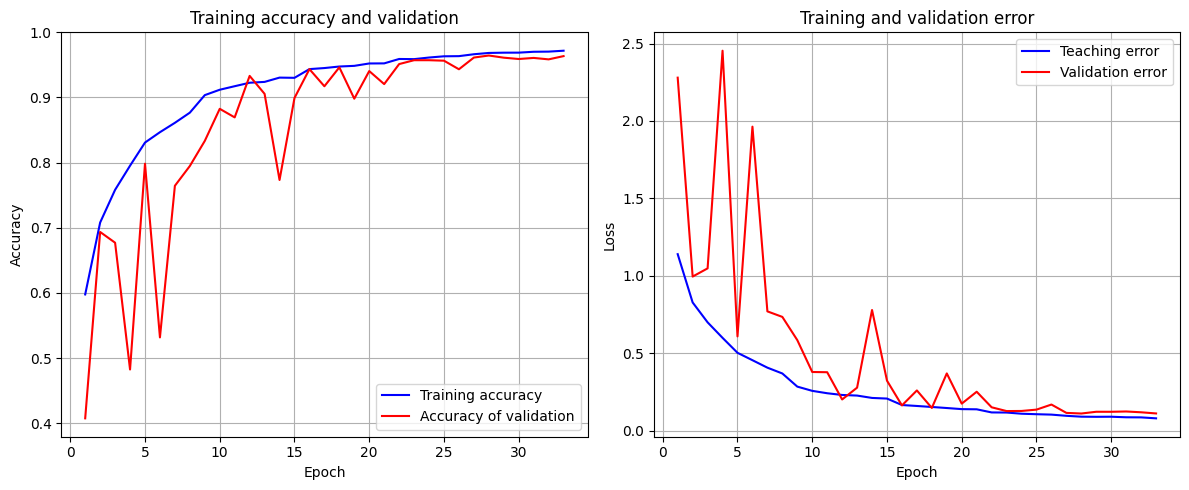

In [ ]:
# Call the function to plot training and validation accuracy/loss graphs
plot_training_history(history)

<br>
<div dir="rtl">
<font size=5>Final Evaluation with Confusion Matrix</font><br>
<font size="4">
In this cell, examine the model's performance in more depth. Which classes is the model strong at recognizing and which is weak at recognizing?
</font>
</div>

<br>
<div dir="rtl">
<font size="4">
Check the Classification Report for the model.
</font>
</div>

In [ ]:
# Import necessary libraries for model evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report  # For evaluation metrics
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations

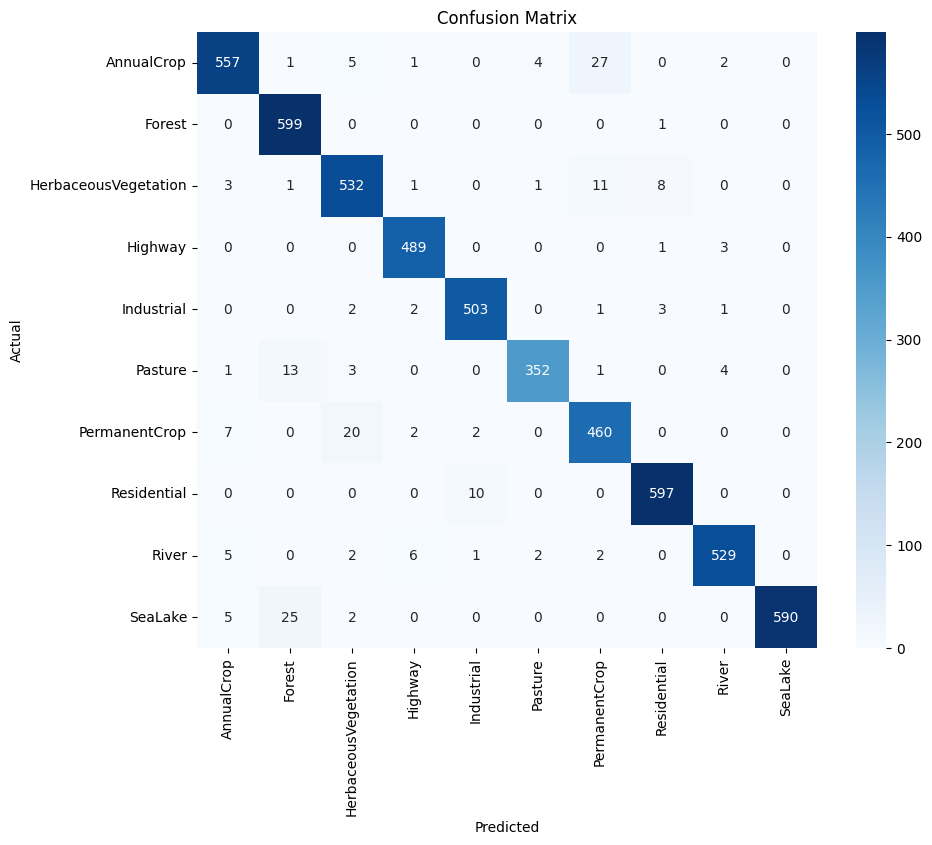

Accuracy of each class:
AnnualCrop: 0.933
Forest: 0.998
HerbaceousVegetation: 0.955
Highway: 0.992
Industrial: 0.982
Pasture: 0.941
PermanentCrop: 0.937
Residential: 0.984
River: 0.967
SeaLake: 0.949

 The best: Forest (0.998)
 The worst: AnnualCrop (0.933)
 Most common mistake: AnnualCrop → PermanentCrop (27 Sample)

Full Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.96      0.93      0.95       597
              Forest       0.94      1.00      0.97       600
HerbaceousVegetation       0.94      0.96      0.95       557
             Highway       0.98      0.99      0.98       493
          Industrial       0.97      0.98      0.98       512
             Pasture       0.98      0.94      0.96       374
       PermanentCrop       0.92      0.94      0.93       491
         Residential       0.98      0.98      0.98       607
               River       0.98      0.97      0.97       547
             SeaLake       1.00

In [ ]:
# Collect predictions
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model.predict(images, verbose=0)  # Make predictions without verbose output
    y_true.extend(labels.numpy())  # Collect true labels
    y_pred.extend(np.argmax(preds, axis=1))  # Collect predicted labels (convert probabilities to class indices)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Analyze class-wise accuracy
print("Accuracy of each class:")
for i, name in enumerate(class_names):
    acc = cm[i,i] / cm[i].sum() if cm[i].sum() > 0 else 0  # Calculate accuracy for each class
    print(f"{name}: {acc:.3f}")

# Find best and worst performing classes
accuracies = [cm[i,i]/cm[i].sum() if cm[i].sum() > 0 else 0 for i in range(len(class_names))]
best_idx, worst_idx = np.argmax(accuracies), np.argmin(accuracies)
print(f"\nBest class: {class_names[best_idx]} ({accuracies[best_idx]:.3f})")
print(f"Worst class: {class_names[worst_idx]} ({accuracies[worst_idx]:.3f})")

# Find most common misclassification
max_error = 0
error_classes = (0, 0)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i,j] > max_error:  # Find off-diagonal element with highest count
            max_error, error_classes = cm[i,j], (i,j)
print(f"Most common mistake: {class_names[error_classes[0]]} → {class_names[error_classes[1]]} ({max_error} samples)")

# Print full classification report
print("\n" + "="*50)
print("Full Classification Report:")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))